In [163]:
import numpy as np
from cdlib import algorithms, viz, evaluation
import networkx as nx
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import entropy
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

In [182]:
with open('../pkl/global_travel_tensor_sorted.pkl', 'rb') as f:
    travel_tensors_raw = pickle.load(f) 

In [183]:
travel_tensors_raw.shape

(200, 226, 452)

Text(0.5, 0, 'Country numbering')

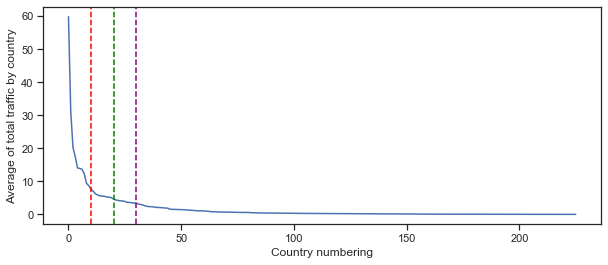

In [184]:
# How to set a cutline
plt.figure(figsize=(10,4))
plt.plot(np.mean(np.sum(travel_tensors_raw, axis=0)[:226,:226], axis=0))
plt.axvline(x=10, linestyle='--', color='red')
plt.axvline(x=20, linestyle='--', color='green')
plt.axvline(x=30, linestyle='--', color='purple')
plt.ylabel("Average of total traffic by country")
plt.xlabel("Country numbering")

In [187]:
country_cutline = 30 # 69, 70 give None homogeneity
travel_tensors = travel_tensors_raw[:,0:country_cutline,0:country_cutline]

In [188]:
travel_tensors.shape

(200, 30, 30)

In [189]:
# # homo_list[10][[homo_list[10] is not None]]
# # print(homo_list[10][30] is None)
# not_none_list = []
# for i in range(len(homo_list[10])): 
#     if(homo_list[10][i] is not None):
#         not_none_list.append(i)
# not_none_list

In [190]:
adj_list = []
interval = 24 # 26 * 4 weeks = 2 year,
for i in range(interval):
    ajm = np.sum(travel_tensors[104 + 4*i:108 + 4*i][:,1:6,1:6], axis=0)
    adj_list.append(ajm)

In [191]:
len(adj_list)

24

In [195]:
with open('../pkl/home_adj_from20180107_sorted.pkl', 'rb') as f:
    home_adj_list_raw = pickle.load(f) 

In [196]:
len(home_adj_list_raw)

24

Text(0.5, 0, 'Country numbering')

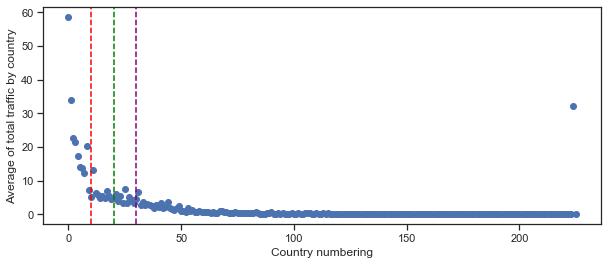

In [135]:
# How to set a cutline
plt.figure(figsize=(10,4))
plt.scatter(range(226), np.mean(np.sum(home_adj_list_raw, axis=0)[:226,:226], axis=0))
plt.axvline(x=10, linestyle='--', color='red')
plt.axvline(x=20, linestyle='--', color='green')
plt.axvline(x=30, linestyle='--', color='purple')
plt.ylabel("Average of total traffic by country")
plt.xlabel("Country numbering")

In [199]:
home_adj_list = np.array(home_adj_list_raw)[:,1:6,1:6]

In [200]:
home_adj_list.shape

(24, 5, 5)

In [201]:
week_slices = pd.date_range('2016-01-04', periods=200, freq='W')

In [202]:
travel_df = pd.read_csv('../csv/global_travel_df.csv')
countries = travel_df['node'].unique().T

In [203]:
with open('../pkl/new_country_order.pkl', 'rb') as f:
    new_order = pickle.load(f) 

In [204]:
countries[new_order]

array(['US', 'GB', 'FR', 'ES', 'IT', 'DE', 'MX', 'CA', 'JP', 'NL', 'BR',
       'TH', 'ID', 'MY', 'SG', 'BE', 'AE', 'AU', 'CH', 'PH', 'IE', 'PT',
       'AR', 'TR', 'RU', 'KW', 'CN', 'IN', 'HK', 'AT', 'GR', 'KR', 'SA',
       'CO', 'SE', 'ZA', 'TW', 'CZ', 'DK', 'CL', 'NO', 'PE', 'PL', 'NZ',
       'EG', 'VN', 'QA', 'HU', 'DO', 'MA', 'IS', 'FI', 'HR', 'CR', 'BH',
       'LU', 'BS', 'IL', 'UY', 'CU', 'VE', 'UA', 'JM', 'VA', 'EC', 'PA',
       'CY', 'NG', 'JO', 'RS', 'RO', 'PY', 'LK', 'CD', 'KE', 'BG', 'MC',
       'MM', 'KH', 'MO', 'LB', 'LV', 'SI', 'PK', 'OM', 'BB', 'GU', 'HN',
       'BD', 'BO', 'TZ', 'AW', 'SK', 'IR', 'EE', 'GH', 'GE', 'BA', 'MT',
       'ZW', 'SY', 'AD', 'AZ', 'GT', 'MV', 'IM', 'SV', 'ET', 'BW', 'NP',
       'PR', 'BY', 'ME', 'DZ', 'KY', 'LT', 'BZ', 'TT', 'TC', 'NI', 'IQ',
       'SX', 'CW', 'LA', 'UG', 'MU', 'TN', 'HT', 'BN', 'KZ', 'MK', 'AG',
       'GI', 'GP', 'MZ', 'RW', 'AM', 'MQ', 'LC', 'PF', 'SC', 'SN', 'GL',
       'ZM', 'AO', 'AL', 'BM', 'SM', 'AF', 'CI', 'V

In [205]:
label_dict = dict(zip(np.char.mod('%d', range(226)), countries[new_order]))
label_dict = dict(zip(range(country_cutline), countries[new_order]))

In [206]:
# This is a dictionary of country numbers & their names
print(label_dict)

{0: 'US', 1: 'GB', 2: 'FR', 3: 'ES', 4: 'IT', 5: 'DE', 6: 'MX', 7: 'CA', 8: 'JP', 9: 'NL', 10: 'BR', 11: 'TH', 12: 'ID', 13: 'MY', 14: 'SG', 15: 'BE', 16: 'AE', 17: 'AU', 18: 'CH', 19: 'PH', 20: 'IE', 21: 'PT', 22: 'AR', 23: 'TR', 24: 'RU', 25: 'KW', 26: 'CN', 27: 'IN', 28: 'HK', 29: 'AT'}


In [207]:
# np.sum(np.array(home_adj_list)[:,:,28],axis=1)


# location = home_adj_list[-6][:,28]
# visitors = np.argwhere(location>0).T[0]
# print(visitors)
# # comb = list(itertools.combinations(visitors, 2))
# # result = 0
# # for c in comb:
# #     result += 1 / spatial.distance.cosine(adjmat[c[0]], adjmat[c[1]])
# # if(len(visitors)*(len(visitors)-1) != 0):
# #     value =result/(len(visitors)*(len(visitors)-1))
# # else:
# #     value = None

In [208]:
from scipy.stats import entropy

# def socgeo_entropy(cnt_num, adjmat):
#     sum_vertical = np.sum(adjmat[:,cnt_num])+ 1e-20
#     pl =adjmat[:,cnt_num] / sum_vertical
#     return entropy(pl)
def socgeo_entropy(adjmat):
    sum_vertical = np.sum(adjmat, axis=0)+ 1e-20
    pl = adjmat / sum_vertical
    # calculate entropy
    entropylist = []
    for i in range(len(pl)):
        entropylist.append(entropy(pl[:,i]))
    return entropylist

In [209]:
# socgeo_entropy(np.array([[0,0.5],[1,0.5]]))
# adjmat = home_adj_list[0]
# location = adjmat[:,0]
# visitors = np.argwhere(location>0).T[0]

In [210]:
from scipy import spatial
import itertools

# def homogeneity(cnt_num, adjmat):
#     location = adjmat[:,cnt_num]
#     visitors = np.argwhere(location>0).T[0]
# #     adjmat[visitors]
#     comb = list(itertools.combinations(visitors, 2))
#     result = 0
#     for c in comb:
#         result += 1 - spatial.distance.cosine(adjmat[c[0]], adjmat[c[1]])
#     if(len(visitors)*(len(visitors)-1) != 0):
#         value =result/(len(visitors)*(len(visitors)-1))
#     else:
#         value = None
#     return value
def homogeneity(cnt_num, adjmat):
#     adjmat=(adjmat>0)*1
    location = adjmat[:,cnt_num]
    visitors = np.argwhere(location>0).T[0]
    comb = list(itertools.combinations(visitors, 2))
    result = 0
    for c in comb:
        cosdist = spatial.distance.cosine(adjmat[c[0]], adjmat[c[1]])
        if(cosdist!=0):
            result += (1/cosdist)
        else:
            continue
    if(len(visitors)*(len(visitors)-1) != 0):
        value =result/(len(visitors)*(len(visitors)-1))
    else:
        value = None
    return value

In [211]:
# for i in range(30):
#     print(homogeneity(i, adj_list[15]))

In [212]:
# def popularity(cnt_num, adjmat):
#     location = adjmat[:,cnt_num]
#     in_weight_sum = np.sum(location)
#     visitors = (np.argwhere(location>0).T[0])
#     num_of_neighbors = np.sum(visitors>=0)
#     return in_weight_sum/num_of_neighbors
def popularity(adjmat):
    in_weight_sum = np.sum(adjmat, axis=0)
    in_degree_sum = np.sum((adjmat>0), axis=0)+1e-20
    popul = np.divide(in_weight_sum, in_degree_sum)
    return popul

In [213]:
# popularity(adjmat)

In [214]:
# G= nx.from_numpy_array(adjmat, type='diGraph')
G = nx.from_numpy_matrix(home_adj_list[2], create_using=nx.DiGraph)
btwcent = nx.betweenness_centrality(G, weight='weight')
brokerage = np.array(list(btwcent.values()))

In [215]:
# adjmat[validx][:,validx].shape

In [216]:
def serial_brokerage(adj_list, plot=False):
    index = 0
    brokerage_list =[]
    for adjmat in adj_list:
        G = nx.from_numpy_matrix(adjmat, create_using=nx.DiGraph)
        btwcent = nx.betweenness_centrality(G, weight='weight')
        brokerage = np.array(list(btwcent.values()))
        brokerage_list.append(brokerage)
        if(plot is True):
            plt.figure(figsize=(12,5))
            plt.scatter(range(len(brokerage)),brokerage)
            plt.scatter([0,12],brokerage[[0,12]])
            plt.text(0,brokerage[0],'US')
            plt.text(12,brokerage[12],'GB')    
#             plt.title("index "+str(index)+ ". from:" + str(week_slices[156-52+4*index].strftime("%y/%m/%d")) + " to:" +str(week_slices[160-52+4*index].strftime("%y/%m/%d")))
            plt.ylabel("brokerage")
            plt.xlabel("country numbers")
        index+=1
    return brokerage_list

In [217]:
def serial_entropy(home_adj_list, plot=False):
    index =0
    entropy_list = []
    for adjmat in home_adj_list:
        ent = socgeo_entropy(adjmat)
        entropy_list.append(ent)
        if(plot is True):
            plt.figure(figsize=(12,5))
            plt.scatter(range(len(ent)), ent)
            plt.scatter([0,12], np.array(ent)[[0,12]])
            plt.text(0,np.array(ent)[0],'US')
            plt.text(12,np.array(ent)[12],'GB')    
#             plt.title("index "+str(index)+ ". from:" + str(week_slices[156-52+4*index].strftime("%y/%m/%d")) + " to:" +str(week_slices[160-52+4*index].strftime("%y/%m/%d")))
            plt.ylabel("Entropy")
            plt.xlabel("Country numbers")
        index += 1
    return entropy_list

In [218]:
def serial_popularity(adj_list, plot=False):
    index=0
    pop_list = []
    for adjmat in adj_list:
        pop = popularity(adjmat)
        pop_list.append(pop)
        if(plot is True):
            plt.figure(figsize=(12,5))
            plt.scatter(range(len(pop)), pop)
            plt.scatter([0,12], pop[[0,12]])
#             plt.title("index "+str(index)+ ". from:" + str(week_slices[156-52+4*index].strftime("%y/%m/%d")) + " to:" +str(week_slices[160-52+4*index].strftime("%y/%m/%d")))
            plt.text(0,pop[0],'US')
            plt.text(12,pop[12],'GB')      
            plt.ylabel("Average In-weight (popularity)")
            plt.xlabel("country numbers")
        index+=1
    return pop_list

In [219]:
def serial_homogeneity(home_adj_list, plot=False):
    index =0
    homo_list = []
    for adjmat in home_adj_list:
        hom=[]
        for i in range(len(adjmat)):
            hom.append(homogeneity(i, adjmat))
        hom = np.array(hom)
        homo_list.append(np.array(hom))
        if(plot is True):
            plt.figure(figsize=(12,5))
            plt.scatter(range(len(hom)), hom)
            plt.scatter([0,12], hom[[0,12]])
            plt.text(0,hom[0],'US')
            plt.text(12,hom[12],'GB') 
#             plt.title("index "+str(index)+ ". from:" + str(week_slices[156-52+4*index].strftime("%y/%m/%d")) + " to:" +str(week_slices[160-52+4*index].strftime("%y/%m/%d")))
            plt.ylabel("Homogeneity")
            plt.xlabel("country numbers")
        index +=1
    return homo_list

In [220]:
def valid_index(input_array):
    not_none_list = []
    for i in range(len(input_array)): 
        if(input_array[i] is not None):
            not_none_list.append(i)
    return np.array(not_none_list)

In [221]:
brokerage_list = serial_brokerage(adj_list)
pop_list = serial_popularity(adj_list)
entropy_list = serial_entropy(home_adj_list)
homo_list = serial_homogeneity(home_adj_list)

/Users/gimpuleumoe/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2664: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


In [222]:
pop_list[10]

array([24.5       ,  6.33333333,  5.75      , 11.        ,  8.5       ])

In [223]:
validx = valid_index(homo_list[9])

             brokerage  popularity   entropy  homogeneity
brokerage      1.00000   -0.490990 -1.000000          NaN
popularity    -0.49099    1.000000  0.866025          NaN
entropy       -1.00000    0.866025  1.000000          NaN
homogeneity        NaN         NaN       NaN          NaN


Text(0.5, 0.98, 'index 22. 4 weeks from:2019/09/15')

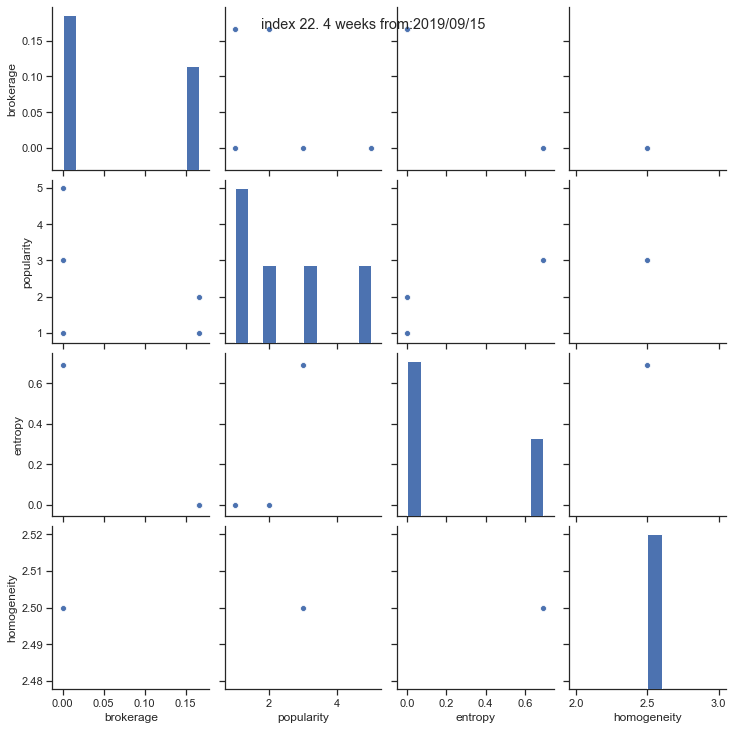

In [224]:
time_index = 22
# for time_index in range(11):
df = pd.DataFrame([brokerage_list[time_index], pop_list[time_index], entropy_list[time_index], homo_list[time_index]]).T
df.columns = ['brokerage','popularity','entropy','homogeneity']
#     print("index "+str(index)+ ". from:" + str(week_slices[156-52+4*index].strftime("%y/%m/%d")) + " to:" +str(week_slices[160-52+4*index].strftime("%y/%m/%d")))
print(df.corr())
g=sns.pairplot(df)
g.fig.suptitle("index "+str(time_index)+ ". 4 weeks from:" + str(week_slices[156-52+4*time_index].strftime("%Y/%m/%d")))


In [225]:
corr_list = []
for time_index in range(len(brokerage_list)):
    print(time_index)
    df = pd.DataFrame([brokerage_list[time_index], pop_list[time_index], entropy_list[time_index], homo_list[time_index]]).T
    df.columns = ['brokerage','popularity','entropy','homogeneity']
    corr_list.append(np.array(df.corr()))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [226]:
corr_list = np.array(corr_list)

In [227]:
df.columns

Index(['brokerage', 'popularity', 'entropy', 'homogeneity'], dtype='object')

In [228]:
print(week_slices[-1])
print(week_slices[107::4])

2019-11-03 00:00:00
DatetimeIndex(['2018-01-28', '2018-02-25', '2018-03-25', '2018-04-22',
               '2018-05-20', '2018-06-17', '2018-07-15', '2018-08-12',
               '2018-09-09', '2018-10-07', '2018-11-04', '2018-12-02',
               '2018-12-30', '2019-01-27', '2019-02-24', '2019-03-24',
               '2019-04-21', '2019-05-19', '2019-06-16', '2019-07-14',
               '2019-08-11', '2019-09-08', '2019-10-06', '2019-11-03'],
              dtype='datetime64[ns]', freq='4W-SUN')


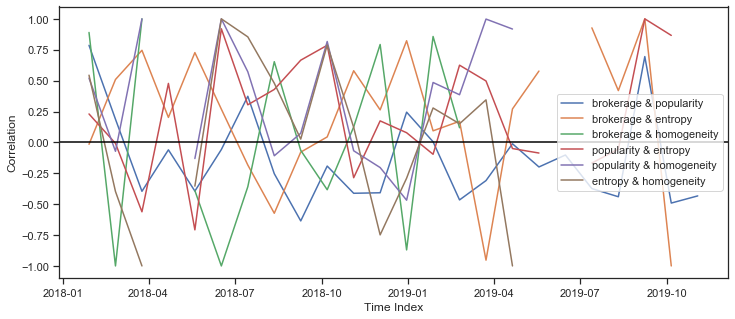

In [229]:
plt.figure(figsize=(12,5))
xaxis = week_slices[107::4]
plt.plot(xaxis, corr_list[:,0,1], label=(df.columns[0] +" & "+ df.columns[1]))
plt.plot(xaxis, corr_list[:,0,2], label=(df.columns[0] +" & "+ df.columns[2]))
plt.plot(xaxis, corr_list[:,0,3], label=(df.columns[0] +" & "+ df.columns[3]))
plt.plot(xaxis, corr_list[:,1,2], label=(df.columns[1] +" & "+ df.columns[2]))
plt.plot(xaxis, corr_list[:,1,3], label=(df.columns[1] +" & "+ df.columns[3]))
plt.plot(xaxis, corr_list[:,2,3], label=(df.columns[2] +" & "+ df.columns[3]))
plt.ylabel("Correlation")
plt.xlabel("Time Index")
plt.axhline(y=0, linestyle='-', color='black')
# plt.axvline(x=xaxis[-3], linestyle='--', color='red')
plt.legend()
plt.show()

In [230]:
print((df.columns[0] +" & "+ df.columns[1]), np.mean(corr_list[:,0,1]))
print((df.columns[0] +" & "+ df.columns[2]), np.mean(corr_list[:,0,2]))
print((df.columns[0] +" & "+ df.columns[3]), np.mean(corr_list[:,0,3]))
print((df.columns[1] +" & "+ df.columns[2]), np.mean(corr_list[:,1,2]))
print((df.columns[1] +" & "+ df.columns[3]), np.mean(corr_list[:,1,3]))
print((df.columns[2] +" & "+ df.columns[3]), np.mean(corr_list[:,2,3]))

brokerage & popularity -0.13921231483769872
brokerage & entropy nan
brokerage & homogeneity nan
popularity & entropy nan
popularity & homogeneity nan
entropy & homogeneity nan


In [231]:
homo_df = pd.DataFrame(homo_list)
homo_df.replace(to_replace=[None], value=np.nan, inplace=True)

In [232]:
np.nanmean(homo_df, axis=1)

/Users/gimpuleumoe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


array([  0.76890506,   2.31428825,   0.65273362,   5.09135771,
         0.69596809,   1.56391269,   2.55402016, 219.01666218,
         1.12463145,   2.14467472,   1.07835646,   3.06114921,
         1.11741339,   0.72627555,   3.15148165,   7.14297515,
       147.59484625,   0.37471352,          nan,   0.5983717 ,
         0.90431088,   0.        ,   2.5       ,          nan])

In [233]:
plt.figure(figsize=(12,5))
# plt.plot(xaxis, np.array(brokerage_list)[:,28], label="brokerage")
plt.plot(xaxis, np.array(entropy_list)[:,28], label="entropy")
# plt.plot(xaxis, np.array(homo_list)[:,28], label="homogeneity")
plt.plot(xaxis, np.array(pop_list)[:,28], label="popularity")
plt.axvline(x=xaxis[-5], linestyle='--', color='red', label="HK demonstration")
plt.legend()
# plt.plot(np.array(brokerage_list)[:,4])
# plt.plot(np.array(brokerage_list)[:,5])

IndexError: index 28 is out of bounds for axis 1 with size 5

<Figure size 864x360 with 0 Axes>

In [234]:
label_dict

{0: 'US',
 1: 'GB',
 2: 'FR',
 3: 'ES',
 4: 'IT',
 5: 'DE',
 6: 'MX',
 7: 'CA',
 8: 'JP',
 9: 'NL',
 10: 'BR',
 11: 'TH',
 12: 'ID',
 13: 'MY',
 14: 'SG',
 15: 'BE',
 16: 'AE',
 17: 'AU',
 18: 'CH',
 19: 'PH',
 20: 'IE',
 21: 'PT',
 22: 'AR',
 23: 'TR',
 24: 'RU',
 25: 'KW',
 26: 'CN',
 27: 'IN',
 28: 'HK',
 29: 'AT'}

In [236]:
pop_list

[array([3. , 4. , 3.5, 4. , 3.5]),
 array([ 4. , 12. ,  8.5,  6.5,  6.5]),
 array([6.66666667, 3.        , 4.        , 5.33333333, 3.        ]),
 array([6.5       , 1.        , 5.        , 4.33333333, 6.        ]),
 array([11.33333333,  8.        ,  5.        ,  6.        ,  3.5       ]),
 array([16.        ,  2.5       ,  6.66666667,  5.33333333,  5.5       ]),
 array([15.        , 11.5       , 13.33333333,  7.        , 13.5       ]),
 array([20.        ,  9.        , 15.66666667,  7.5       ,  5.5       ]),
 array([17.66666667,  7.66666667, 22.        ,  5.33333333, 10.5       ]),
 array([16.75      ,  8.5       , 12.33333333, 11.33333333,  7.5       ]),
 array([24.5       ,  6.33333333,  5.75      , 11.        ,  8.5       ]),
 array([13.        ,  5.66666667,  5.        ,  4.5       ,  5.        ]),
 array([18.        ,  6.66666667,  5.4       ,  8.        ,  6.5       ]),
 array([ 8.66666667,  7.66666667, 10.        ,  7.33333333, 12.        ]),
 array([18.33333333,  9.66666667,  

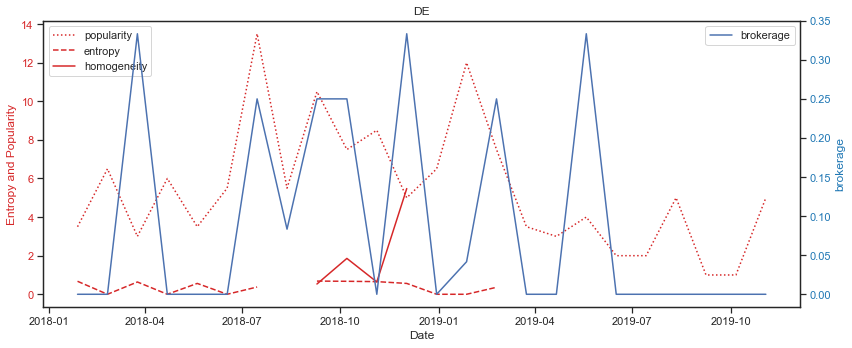

In [247]:
cnt_num=
t = np.arange(0.01, 10.0, 0.01)
fig, ax1 = plt.subplots(figsize=(12,5))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Entropy and Popularity', color=color)
plt.plot(xaxis, np.array(pop_list)[:,cnt_num], label="popularity", color=color, linestyle='dotted')
ax1.plot(xaxis, np.array(entropy_list)[:,cnt_num], label="entropy", color=color, linestyle='--')
ax1.plot(xaxis, np.array(homo_list)[:,cnt_num], label="homogeneity", color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc=2)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('brokerage', color=color)  # we already handled the x-label with ax1
ax2.plot(xaxis, np.array(brokerage_list)[:,cnt_num], label="brokerage")
ax2.tick_params(axis='y', labelcolor=color)
# plt.axvline(x=xaxis[-5], linestyle='-', color='green', label="Hong Kong Demonstration")
plt.legend(loc=1)
plt.title(label_dict[cnt_num+1])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

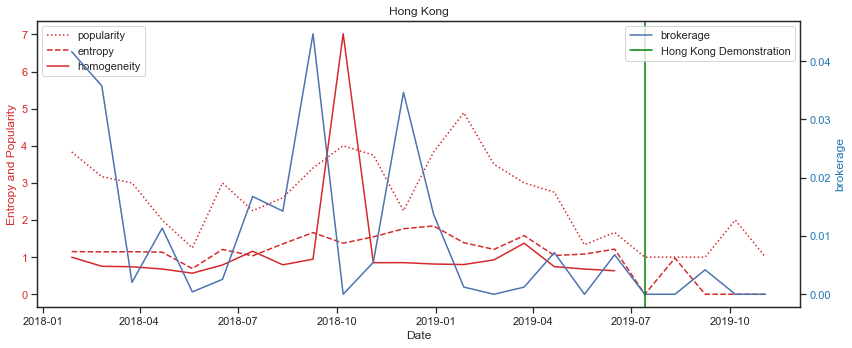

In [45]:
# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
fig, ax1 = plt.subplots(figsize=(12,5))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Entropy and Popularity', color=color)
plt.plot(xaxis, np.array(pop_list)[:,28], label="popularity", color=color, linestyle='dotted')
ax1.plot(xaxis, np.array(entropy_list)[:,28], label="entropy", color=color, linestyle='--')
ax1.plot(xaxis, np.array(homo_list)[:,28], label="homogeneity", color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc=2)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('brokerage', color=color)  # we already handled the x-label with ax1
ax2.plot(xaxis, np.array(brokerage_list)[:,28], label="brokerage")
ax2.tick_params(axis='y', labelcolor=color)
plt.axvline(x=xaxis[-5], linestyle='-', color='green', label="Hong Kong Demonstration")
plt.legend(loc=1)
plt.title("Hong Kong")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

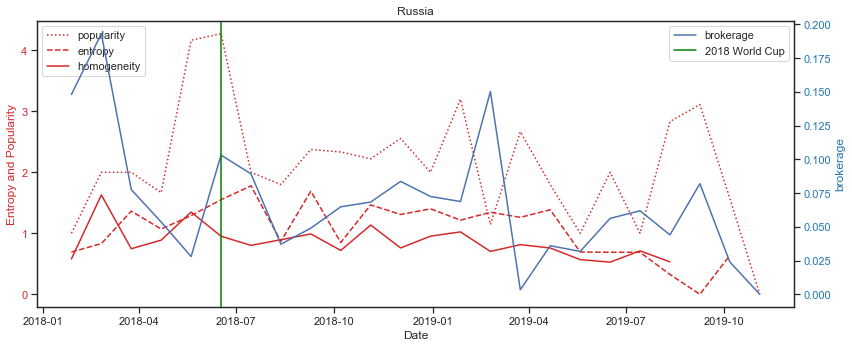

In [46]:
# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
fig, ax1 = plt.subplots(figsize=(12,5))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Entropy and Popularity', color=color)
plt.plot(xaxis, np.array(pop_list)[:,24], label="popularity", color=color, linestyle='dotted')
ax1.plot(xaxis, np.array(entropy_list)[:,24], label="entropy", color=color, linestyle='--')
ax1.plot(xaxis, np.array(homo_list)[:,24], label="homogeneity", color=color, )
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc=2)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('brokerage', color=color)  # we already handled the x-label with ax1
ax2.plot(xaxis, np.array(brokerage_list)[:,24], label="brokerage")
ax2.tick_params(axis='y', labelcolor=color)
plt.axvline(x=xaxis[5], linestyle='-', color='green', label="2018 World Cup")
plt.legend(loc=1)
plt.title("Russia")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [56]:
# cnt_num = 28
# out_adj = np.array(adj_list)[:,28,:]
# in_adj = np.array(adj_list)[:,:,28]
# out_home_adj = np.array(home_adj_list)[:,28,:]
# in_home_adj = np.array(home_adj_list)[:,:,28]
# print(out_adj)

replcae homogeneity = None as -1. Because it has a strong abnormal sign.

entropy = nan as -1. Because it has a strong abnormal sign.

In [178]:
def scale(array):
    nu = array - np.min(array)
    deno = np.max(array)-np.min(array)
    return 10*nu/deno

In [240]:
cnt_num = 28
B = np.array(brokerage_list)[:,cnt_num]
B = scale(B)
P = np.array(pop_list)[:,cnt_num]
P = scale(P)
H = np.where(np.array(homo_list)[:,cnt_num]==None, 0, np.array(homo_list)[:,cnt_num])
H = scale(H)
E = np.array(entropy_list)[:,cnt_num]
where_are_NaNs = np.isnan(E)
E[where_are_NaNs] = 0
E = scale(E)

# BPHE = np.vstack((B,P,H,E)).T
# PE = np.vstack((P,E)).T

Text(0.5, 1.0, 'BPHE scores')

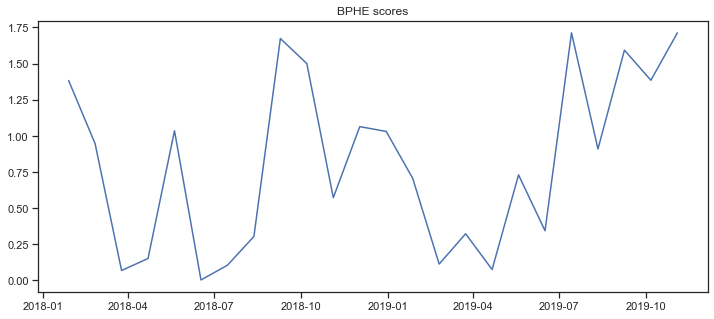

In [379]:
BPHE= B+P+H+E
stdBPHE =(BPHE - np.mean(BPHE))/np.std(BPHE)
plt.figure(figsize=(12,5))
plt.plot(xaxis,np.abs(stdBPHE))
plt.title("BPHE scores")

In [262]:
np.sum(np.array(adj_list)[:,:,cnt_num],axis=1)

array([23., 19., 15., 12.,  5., 12., 18., 13., 17., 24., 30., 18., 23.,
       44., 14., 12., 11.,  4.,  5.,  1.,  2.,  1.,  2.,  1.])

In [263]:
IW = np.sum(np.array(adj_list)[:,:,cnt_num], axis=1)
OW = np.sum(np.array(adj_list)[:,cnt_num,:], axis=1)
ID =np.sum(np.array(adj_list)[:,:,cnt_num]>0, axis=1)
OD =np.sum(np.array(adj_list)[:,cnt_num,:]>0, axis=1)

In [342]:
stdB = (B - np.mean(B))/np.std(B)
stdP = (P - np.mean(P))/np.std(P)
stdH = (H - np.mean(H))/np.std(H)
stdE = (E - np.mean(E))/np.std(E)
stdIW = (IW - np.mean(IW))/np.std(IW)
stdOW = (OW - np.mean(OW))/np.std(OW)

In [353]:
# X = np.vstack((stdB, stdP, stdH, stdE, IW, OW)).T
X = np.vstack((stdB, stdP, stdH, stdE)).T
clf = IsolationForest(random_state=0)
clf.fit(X)
neg_scores = clf.score_samples(X)
ISF_scores = neg_scores * -1

In [371]:
clf = LocalOutlierFactor(n_neighbors=5)
clf.fit(X)
LOF_scores = clf.negative_outlier_factor_ * -1

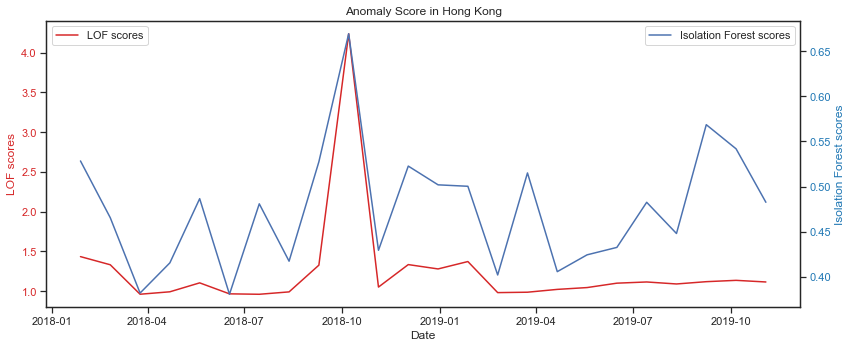

In [378]:
fig, ax1 = plt.subplots(figsize=(12,5))
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('LOF scores', color=color)
plt.plot(xaxis, LOF_scores, label="LOF scores", color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc=2)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Isolation Forest scores', color=color)  # we already handled the x-label with ax1
ax2.plot(xaxis, ISF_scores, label="Isolation Forest scores")
ax2.tick_params(axis='y', labelcolor=color)
# plt.axvline(x=xaxis[5], linestyle='-', color='green', label="2018 World Cup")
plt.legend(loc=1)
plt.title("Anomaly Score in Hong Kong")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

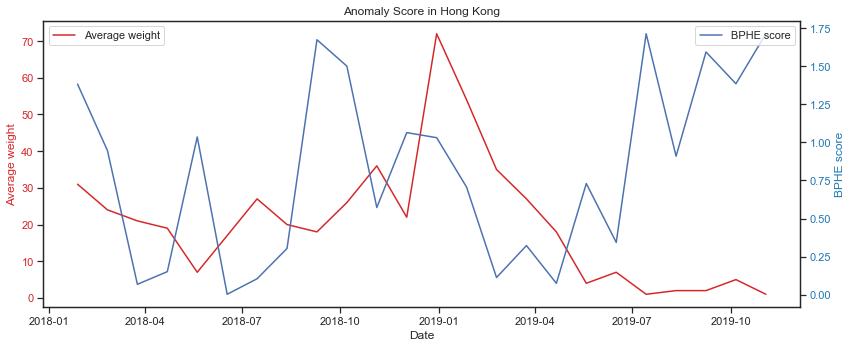

In [380]:
# Create some mock data
fig, ax1 = plt.subplots(figsize=(12,5))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Average weight', color=color)
plt.plot(xaxis, IW+OW, label="Average weight", color=color)
# ax1.plot(xaxis, np.array(homo_list)[:,24], label="homogeneity", color=color, )
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc=2)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('BPHE score', color=color)  # we already handled the x-label with ax1
ax2.plot(xaxis, np.abs(stdBPHE), label="BPHE score")
ax2.tick_params(axis='y', labelcolor=color)
# plt.axvline(x=xaxis[5], linestyle='-', color='green', label="2018 World Cup")
plt.legend(loc=1)
plt.title("Anomaly Score in Hong Kong")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()